# Создаем свою копию этого блокнота

Можно работать прямо здесь, но так как владелец этого колаба не вы, и колаб открыт только для чтения, то любые ваши изменения не сохранятся. Поэтому сначала нужно создать свою копию и потом работать в ней.

Для этого нужно нажать на "Копировать на Диск" в шапке этой страницы:
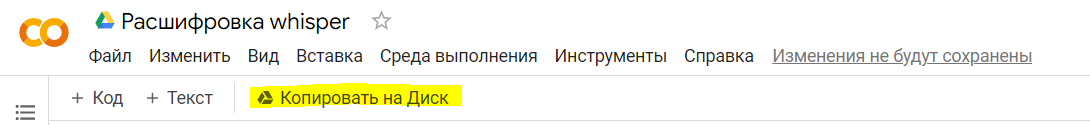

Дальше работаем в своей копии. После создания она назовется "Копия блокнота Расшифровка whisper". Ее можно переименовать и т. д.

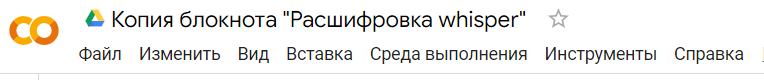

# Подготовка колаба к долгой работе

Обычно расшифровка 1 часа записи с помощью этой модели длится примерно 6 часов. Все это время находиться за компьютером и следить за программой сложно, а Google Colab имеет свойство отключаться примерно через 90 минут, если пользователь все это время ничего не делал в коде. Можно подходить и, например, каждый час кликать в любую ячейку, а можно автоматизировать эти клики одним хитрым способом:

1. Находясь в колабе, жмем ctrl + shift + i

В правой части страницы появляется панель разработчика, выбираем там вкладку Консоль (Console)

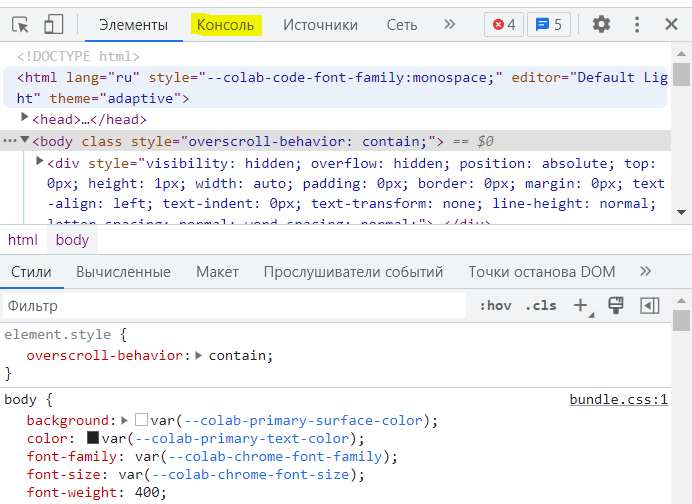
2. В консоль вставляем вот этот код:

```
function ClickConnect(){
console.log("Working");  
document.querySelector("colab-toolbar-button").click()  
}setInterval(ClickConnect,60000)
```
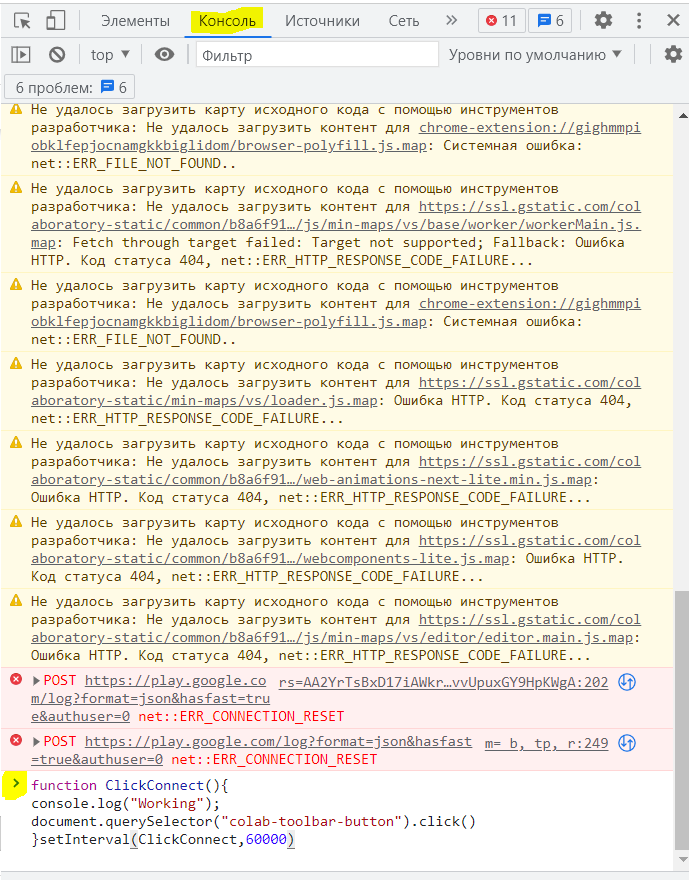
3. Жмем Enter. Этот код искуственно наводит суету в колабе: автоматически создает новые пустые ячейки. Колаб это видит, думает, что пользователь не бездействует, и не прерывает программу.

**NB: все время, пока работает программа, нужно следить за стабильностью интернета (лучше не включать-выключать VPN) и тем более не выключать компьютер. Если собьется подключение к интернету, собьется и программа. Вкладку с колабом тоже лучше не закрывать.**


# Загрузка записи интервью

Первый способ самый простой, но самый долгий, а третий самый сложный, но самый быстрый. Второй умеренный во всех смыслах.

## Первый способ

Тут пользователю просто предлагается выбрать файл с компьютера. Нужно просто запустить ячейку ниже.

P.S. Чтобы запустить ячейку здесь и далее, нужно нажать на image.png в левом верхнем углу ячейки ниже

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

## Второй способ

Тут больше действий. Сначала нужно найти в левой части экрана значок папки и нажать на него.

 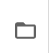

Затем на открывшейся панели нажать на значок импорта файлов и выбрать нужный файл у себя на компьютере.

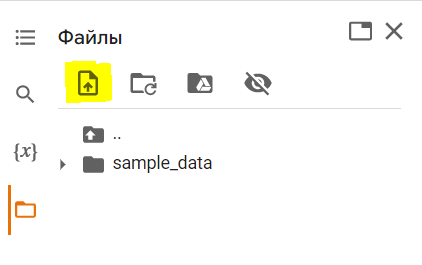

Когда появится предупреждение, нажать "ОК"

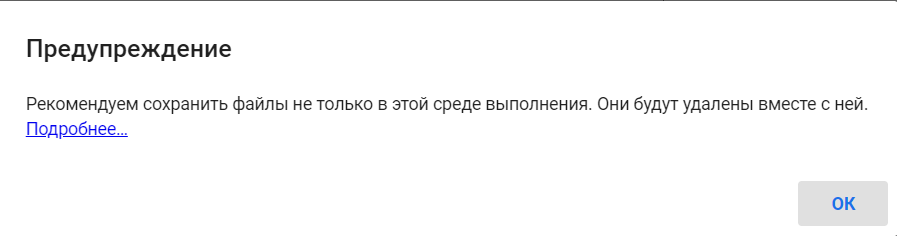

Файл появится в списке в той же панели, а прогресс загрузки можно будет наблюдать внизу.

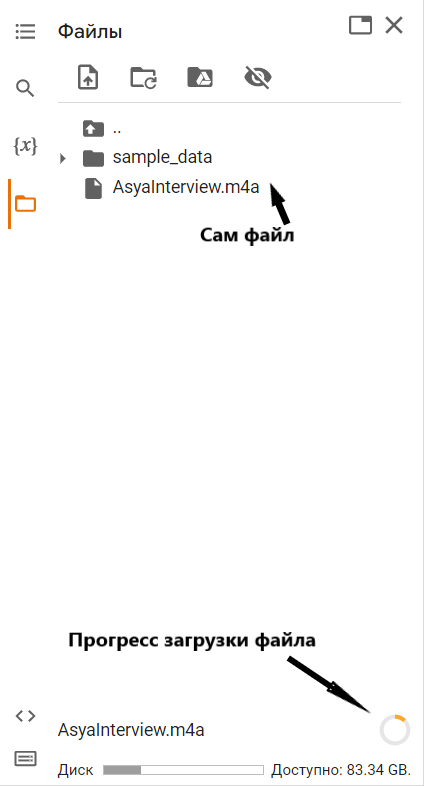


Запустите ячейку ниже и в появившееся поле введите имя файла с расширением. Например, `AsyaInterview.m4a`

In [ ]:
filename = '/content/' + input('Введите имя сюда:\n')

Введите имя сюда:
AsyaInterview.m4a


## Третий способ

Третий способ самый сложный.

Сначала нужно загрузить файл интервью себе на гуглдиск (который принадлежит тому же аккаунту, с которого вы сидите в этом колабе). Положите файл в корень диска (не внутрь какой-нибудь папки на диске, а просто в диск).


Или можно не класть файл на диск вручную, а создать ярлык файла у себя на диске, находясь прямо в папке СБъ. Для этого нужно правой кнопкой мыши кликнуть на аудиофайл и нажать "Добавить ярлык на Диск" (на свой)

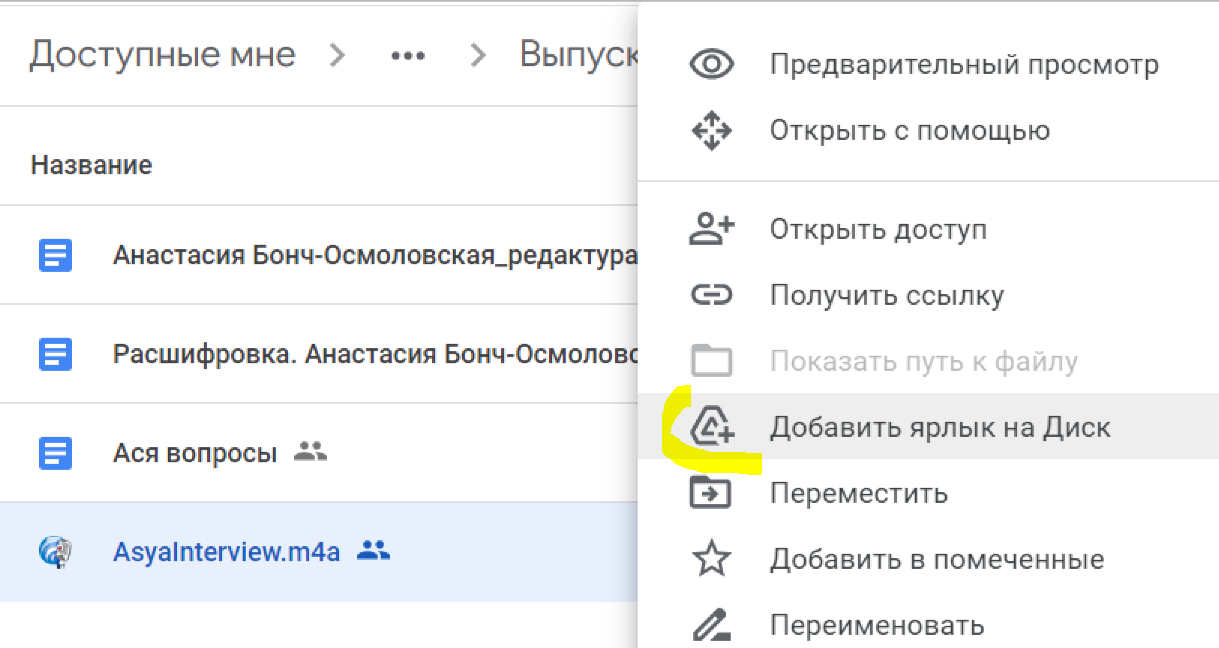

2. Дальше нужно получить доступ к своему диску из колаба. Для этого нужно запустить ячейку ниже и на все вопросы колаба нажимать "Разрешить"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

То, что в панели файлов появилась папка drive, означает, что ваш диск загрузился в колаб.

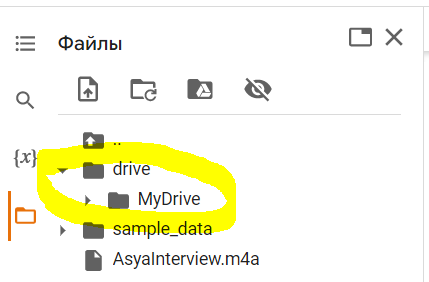

Запустите ячейку ниже и в появившееся поле введите имя файла с расширением. Например, `AsyaInterview.m4a`

In [ ]:
filename = '/content/drive/MyDrive/' + input('Введите имя сюда:\n')

Введите имя сюда:
AsyaInterview.m4a


# Сам код для расшифровки

Эта программа устанавливает и импортирует Whisper, применяет его и в конце результат записывает в txt файл, который автоматически скачивается, когда программа отработала. Если, например, файл с аудио назывался **audio.mp3**, то текстовый файл автоматически назовется **audio.mp3.txt**

Как говорилось выше, расшифровка будет длиться долго. Ход работы программы можно будет видеть ниже: промежуточные результаты будут выводиться на экран.

In [ ]:
!pip install git+https://github.com/openai/whisper.git
import whisper

!whisper $filename --language ru --output_format txt
from google.colab import files
files.download(filename + '.txt')

# Что делать дальше

Отредактировать полученную нейросетевую расшифровку